# Practical No. 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Temperatures.csv')

In [3]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [4]:
# input data
x = df["YEAR"]

# output data
y = df.ANNUAL

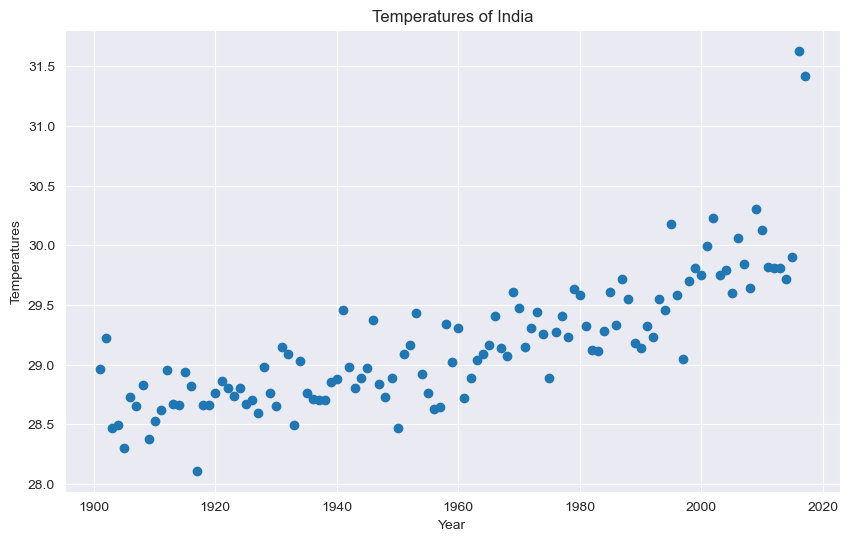

In [5]:
plt.figure(figsize=(10,6))
plt.title("Temperatures of India")
plt.xlabel("Year")
plt.ylabel("Temperatures")
plt.scatter(x,y)

In [6]:
# regression model takes in 2-dimensional df so need to reshape
x.shape

(117,)

In [7]:
x = [a for a in x]
x = pd.Series(x)

x = x.values.reshape(117,1)
x.shape

(117, 1)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [10]:
regressor.coef_

array([0.01312158])

In [11]:
regressor.intercept_

3.4761897126187016

In [12]:
regressor.predict([[2003]])

array([29.7587171])

In [13]:
regressor.predict([[2080]])

array([30.76907886])

In [14]:
predicted = regressor.predict(x)
predicted

array([28.4203158 , 28.43343739, 28.44655897, 28.45968055, 28.47280213,
       28.48592371, 28.49904529, 28.51216687, 28.52528846, 28.53841004,
       28.55153162, 28.5646532 , 28.57777478, 28.59089636, 28.60401794,
       28.61713952, 28.63026111, 28.64338269, 28.65650427, 28.66962585,
       28.68274743, 28.69586901, 28.70899059, 28.72211218, 28.73523376,
       28.74835534, 28.76147692, 28.7745985 , 28.78772008, 28.80084166,
       28.81396324, 28.82708483, 28.84020641, 28.85332799, 28.86644957,
       28.87957115, 28.89269273, 28.90581431, 28.91893589, 28.93205748,
       28.94517906, 28.95830064, 28.97142222, 28.9845438 , 28.99766538,
       29.01078696, 29.02390855, 29.03703013, 29.05015171, 29.06327329,
       29.07639487, 29.08951645, 29.10263803, 29.11575961, 29.1288812 ,
       29.14200278, 29.15512436, 29.16824594, 29.18136752, 29.1944891 ,
       29.20761068, 29.22073227, 29.23385385, 29.24697543, 29.26009701,
       29.27321859, 29.28634017, 29.29946175, 29.31258333, 29.32

## Report generations


In [15]:
# Mean absolute error
MAE = np.mean(abs( y - predicted))
MAE

0.22535284978630413

In [16]:
# Mean Squared Error
MSE = np.mean(np.square(y - predicted))
MSE

0.10960795229110352

In [17]:
# Root Mean Squared Error
RMSE = np.sqrt(np.mean(np.square(y - predicted)))
RMSE

0.3310709173139548

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
mean_absolute_error(y ,predicted)


0.22535284978630413

In [20]:
mean_squared_error(y ,predicted)

0.10960795229110352

In [21]:
r2_score(y, predicted)

0.6418078912783682

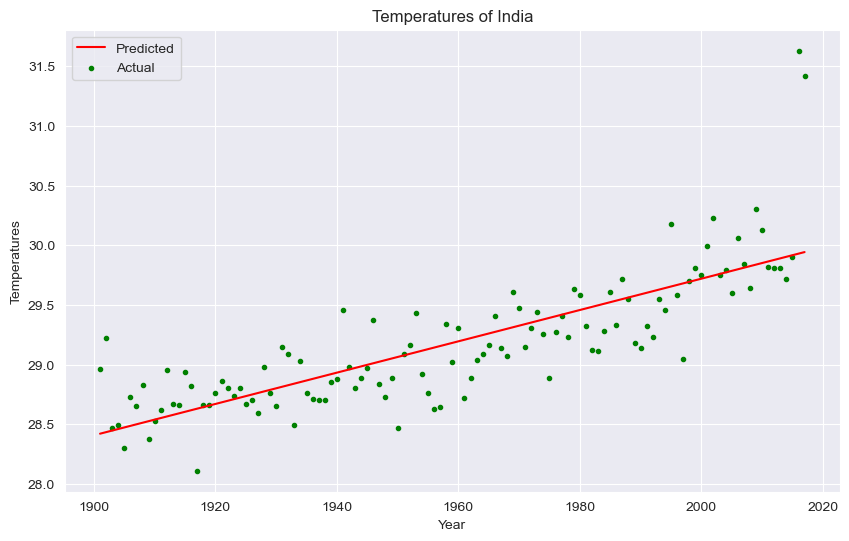

In [22]:
plt.figure(figsize=(10,6))
plt.title("Temperatures of India")
plt.xlabel("Year")
plt.ylabel("Temperatures")
plt.plot(x,predicted, label= "Predicted", color="r")
plt.scatter(x,y, label= "Actual", color="g", marker=".")
plt.legend()

<Axes: xlabel='YEAR', ylabel='ANNUAL'>

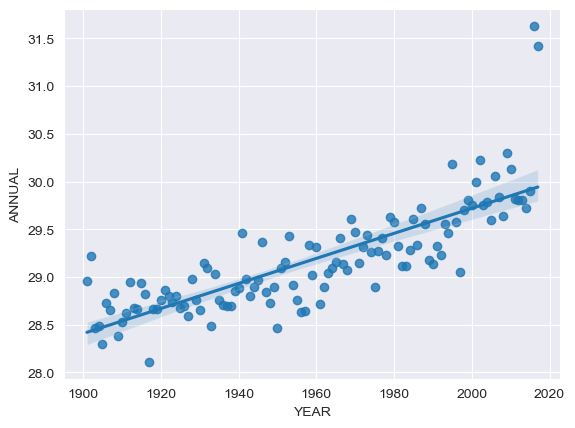

In [23]:
sns.regplot(x="YEAR", y="ANNUAL", data=df)